In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
data=[]
DATADIR = "C:\Characters"
CATEGORIES = ["character_1_ka","character_2_kha","character_3_ga","character_4_gha",
              "character_5_kna","character_6_cha","character_7_chha","character_8_ja",
              "character_9_jha","character_10_yna","digit_0","digit_1","digit_2", 
              "digit_3", "digit_4","digit_5","digit_6","digit_7","digit_8","digit_9"]
for category in CATEGORIES:
    path =os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_array = img_array.reshape(1,1024)
        data.append([img_array, class_num])

In [3]:
import random
random.shuffle(data)

m=40000

i=0
x_train=np.zeros([36000,1024],dtype = int)
y_train=np.zeros([36000,1], dtype= int)
for element in data[:36000]:
    x_train[i,:]=element[0]
    y_train[i]=element[1]
    i+=1

i=0
x_test=np.zeros([4000,1024],dtype = int)
y_test=np.zeros([4000,1], dtype= int)
for element in data[36000:40000]:
    x_test[i,:]=element[0]
    y_test[i]=element[1]
    i+=1

x_train=x_train.T
x_test=x_test.T
x_train=x_train/255.
y_train=y_train.T
y_train=y_train[0,:]
y_test=y_test.T
y_test=y_test[0,:]

In [4]:
def init_params():
    W1 = np.random.rand(16,1024)-0.5
    b1 = np.random.rand(16,1)-0.5
    W2 = np.random.rand(16,16)-0.5
    b2 = np.random.rand(16,1)-0.5
    W3 = np.random.rand(20,16)-0.5
    b3 = np.random.rand(20,1)-0.5
    return W1, b1, W2, b2, W3, b3

def relu(Z):
    return np.maximum(Z,0)

def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)
    

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = relu(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = 2*(A3 - one_hot_Y)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3,1)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2,1)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1,1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 -= alpha * np.reshape(db1, (16,1))    
    W2 = W2 - alpha * dW2  
    b2 -= alpha * np.reshape(db2, (16,1))   
    W3 = W3 - alpha * dW3
    b3 -= alpha * np.reshape(db3, (20,1)) 
    return W1, b1, W2, b2, W3, b3

In [5]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3  = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

In [6]:
W1, b1, W2, b2, W3, b3 = gradient_descent(x_train, y_train, 0.10, 1001)

Iteration:  0
[ 7 15 15 ... 10  7  7] [ 7  7 12 ... 10  1 18]
0.07219444444444445
Iteration:  50
[ 8 11  3 ... 10  8 18] [ 7  7 12 ... 10  1 18]
0.26902777777777775
Iteration:  100
[ 7  0  7 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.44358333333333333
Iteration:  150
[ 7  7  7 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.5455555555555556
Iteration:  200
[ 7  7  7 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.5906111111111111
Iteration:  250
[ 7  7  7 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.6209722222222223
Iteration:  300
[ 7  7  7 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.6499722222222222
Iteration:  350
[ 7  7  7 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.67875
Iteration:  400
[ 7  7 12 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.6931666666666667
Iteration:  450
[ 7  7 12 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.6954166666666667
Iteration:  500
[ 7  7 13 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.7271666666666666
Iteration:  550
[ 7  7 13 ... 10 15 18] [ 7  7 12 ... 10  1 18]
0.7385277777777778
Iteration:  600

In [7]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((32, 32)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [8]:
def test_validation(index, W1, b1, W2, b2, W3, b3):
    current_image = x_test[:, index, None]
    prediction = make_predictions(x_test[:, index, None], W1, b1, W2, b2, W3, b3)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((32, 32)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [9]:
test_pred= np.zeros([4000],dtype=int)
for i in range(4000):
    test_pred[i] = make_predictions(x_test[:, i, None], W1, b1, W2, b2, W3, b3)
test_acc = get_accuracy(test_pred, y_test)

[ 7  1 10 ...  6 17  4] [ 9  1 10 ...  6 17  4]


In [10]:
print(test_acc)

0.765


Prediction:  [1]
Label:  1


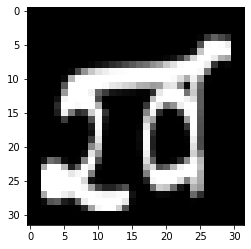

Prediction:  [19]
Label:  19


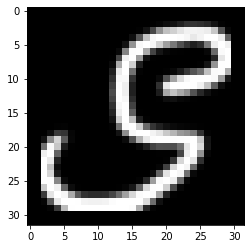

Prediction:  [4]
Label:  2


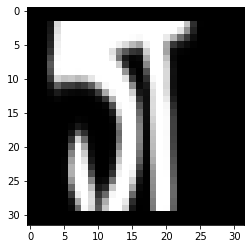

Prediction:  [6]
Label:  6


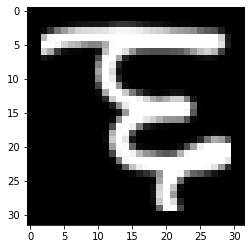

Prediction:  [14]
Label:  14


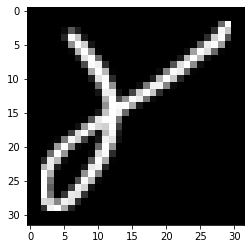

Prediction:  [2]
Label:  2


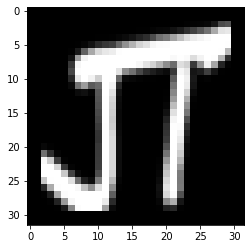

Prediction:  [11]
Label:  11


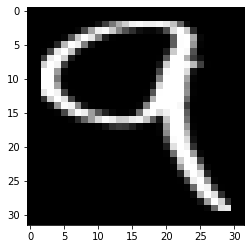

Prediction:  [7]
Label:  13


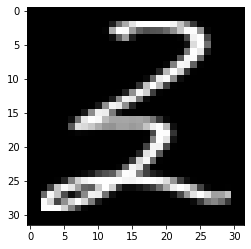

Prediction:  [0]
Label:  0


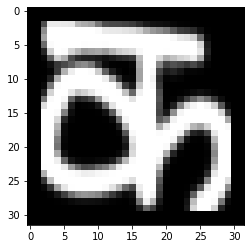

Prediction:  [15]
Label:  15


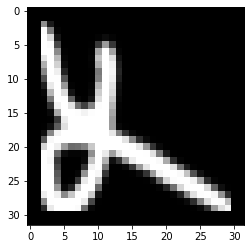

Prediction:  [10]
Label:  10


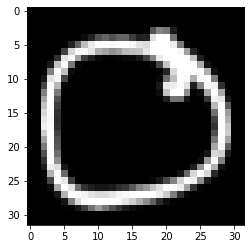

Prediction:  [10]
Label:  10


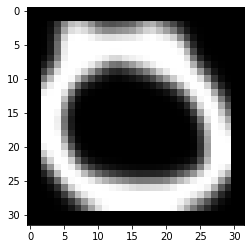

Prediction:  [12]
Label:  12


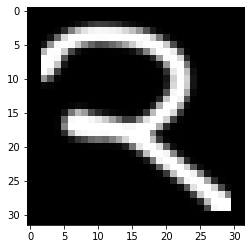

Prediction:  [8]
Label:  8


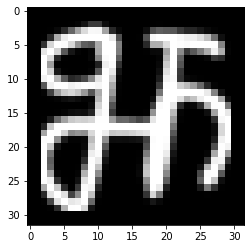

Prediction:  [4]
Label:  4


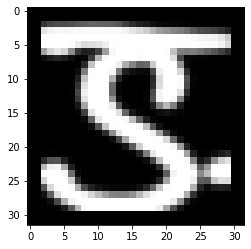

Prediction:  [14]
Label:  14


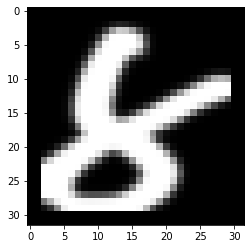

Prediction:  [14]
Label:  5


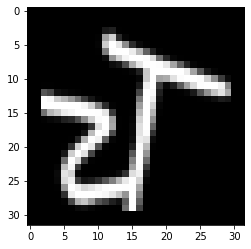

Prediction:  [19]
Label:  19


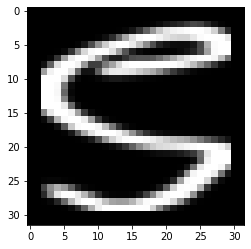

Prediction:  [13]
Label:  13


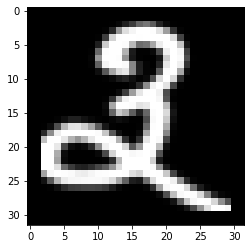

Prediction:  [17]
Label:  17


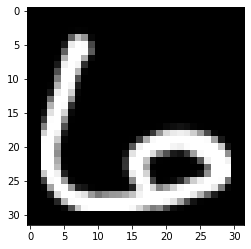

Prediction:  [8]
Label:  8


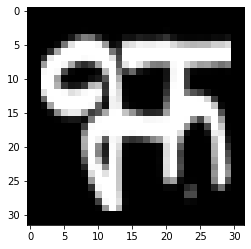

Prediction:  [9]
Label:  9


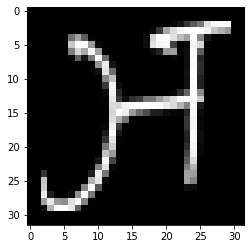

Prediction:  [3]
Label:  3


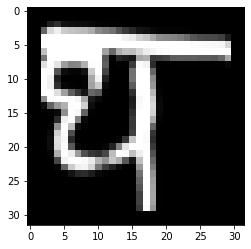

Prediction:  [4]
Label:  4


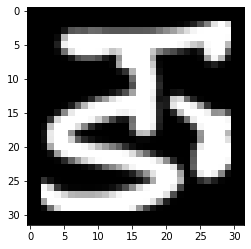

Prediction:  [13]
Label:  13


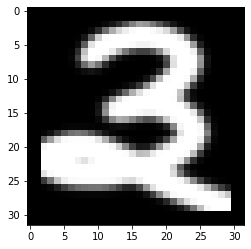

Prediction:  [16]
Label:  4


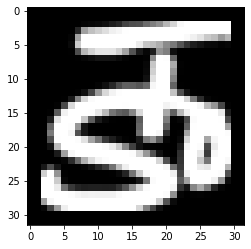

Prediction:  [13]
Label:  15


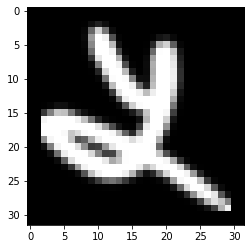

Prediction:  [17]
Label:  17


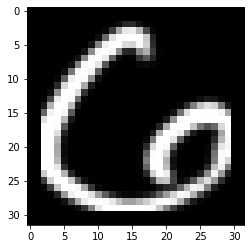

Prediction:  [15]
Label:  15


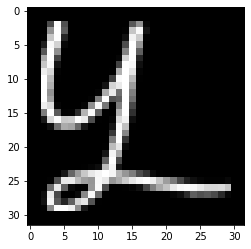

Prediction:  [18]
Label:  18


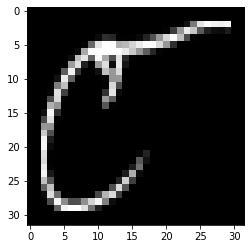

Prediction:  [19]
Label:  19


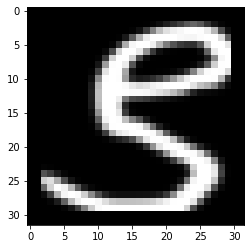

Prediction:  [1]
Label:  1


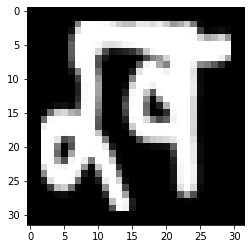

Prediction:  [19]
Label:  19


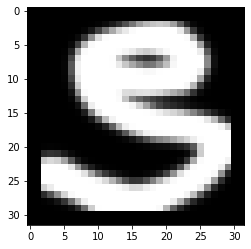

Prediction:  [2]
Label:  4


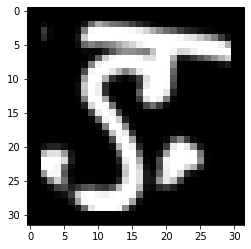

Prediction:  [1]
Label:  1


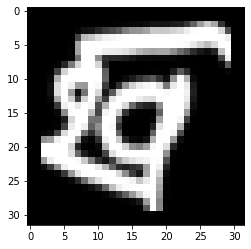

Prediction:  [1]
Label:  1


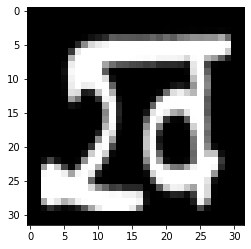

Prediction:  [15]
Label:  13


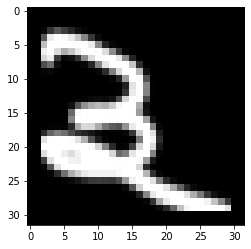

Prediction:  [12]
Label:  12


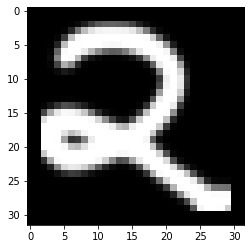

Prediction:  [8]
Label:  8


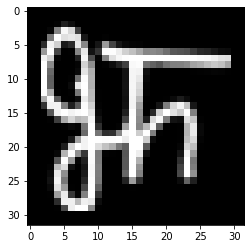

Prediction:  [8]
Label:  0


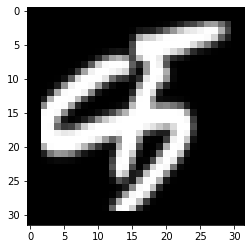

Prediction:  [14]
Label:  14


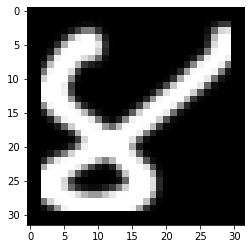

Prediction:  [17]
Label:  17


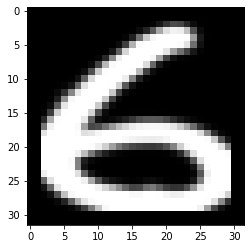

Prediction:  [13]
Label:  13


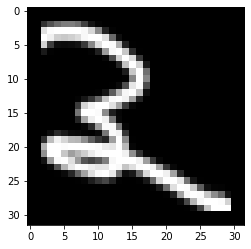

Prediction:  [17]
Label:  17


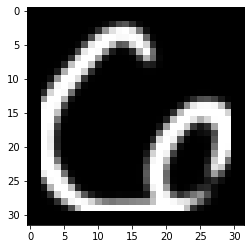

Prediction:  [1]
Label:  1


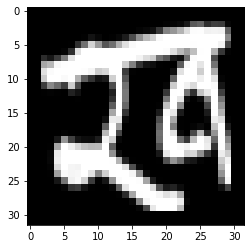

Prediction:  [0]
Label:  0


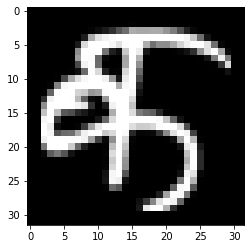

Prediction:  [19]
Label:  5


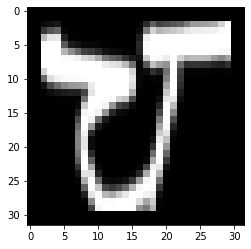

Prediction:  [13]
Label:  13


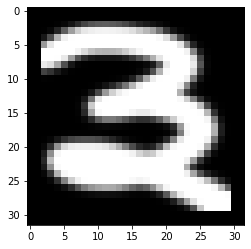

Prediction:  [19]
Label:  2


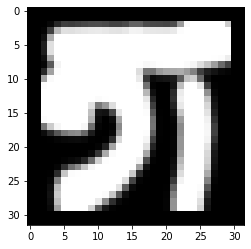

Prediction:  [17]
Label:  17


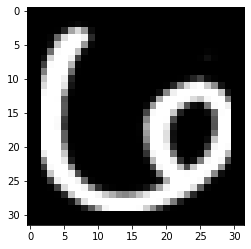

Prediction:  [16]
Label:  19


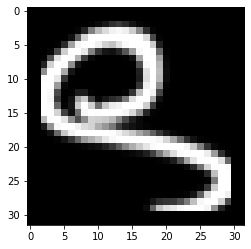

Prediction:  [9]
Label:  11


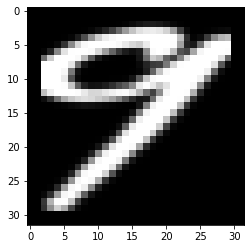

Prediction:  [8]
Label:  8


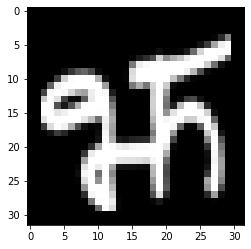

Prediction:  [0]
Label:  0


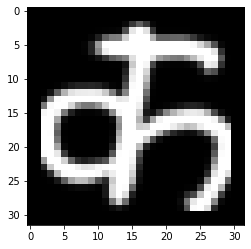

Prediction:  [18]
Label:  18


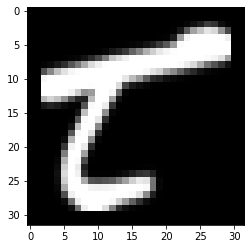

Prediction:  [8]
Label:  8


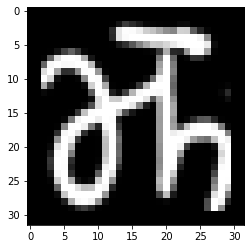

Prediction:  [16]
Label:  16


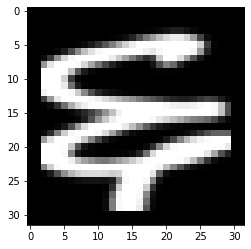

Prediction:  [19]
Label:  19


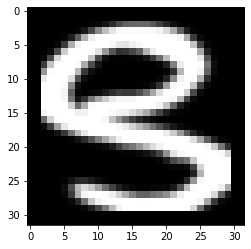

Prediction:  [17]
Label:  17


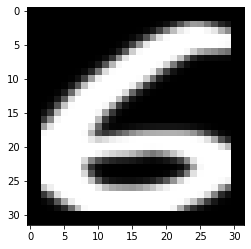

Prediction:  [16]
Label:  16


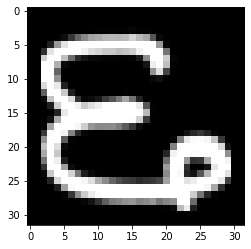

Prediction:  [8]
Label:  8


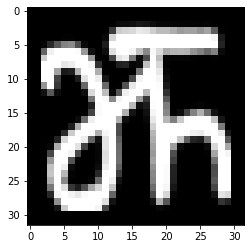

Prediction:  [19]
Label:  10


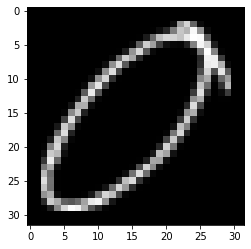

Prediction:  [17]
Label:  7


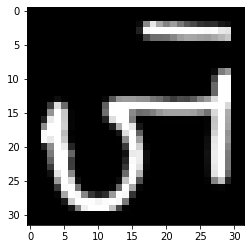

Prediction:  [8]
Label:  8


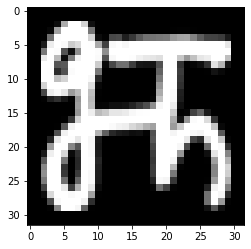

Prediction:  [4]
Label:  4


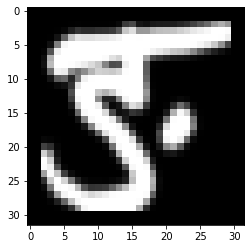

Prediction:  [3]
Label:  3


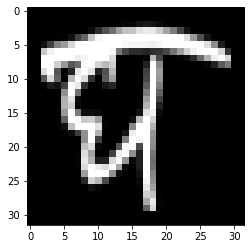

Prediction:  [18]
Label:  18


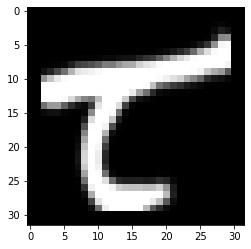

Prediction:  [18]
Label:  18


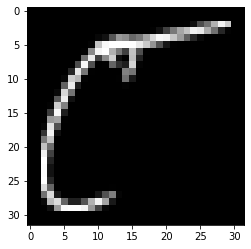

Prediction:  [8]
Label:  9


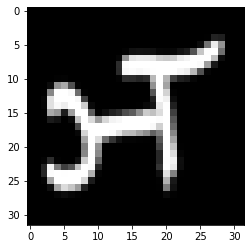

Prediction:  [11]
Label:  11


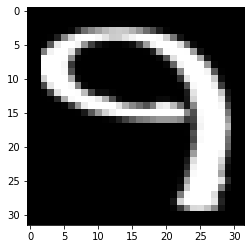

Prediction:  [15]
Label:  15


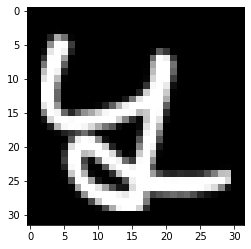

Prediction:  [10]
Label:  10


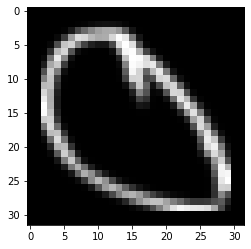

Prediction:  [13]
Label:  13


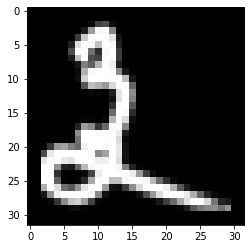

Prediction:  [18]
Label:  18


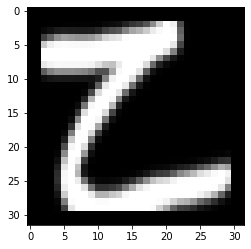

Prediction:  [12]
Label:  13


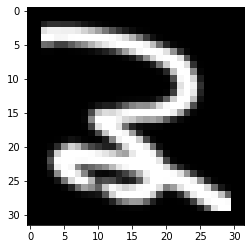

Prediction:  [10]
Label:  10


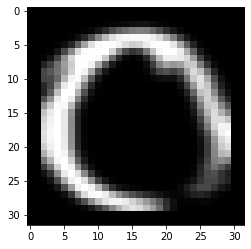

Prediction:  [19]
Label:  19


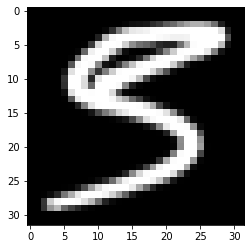

Prediction:  [18]
Label:  18


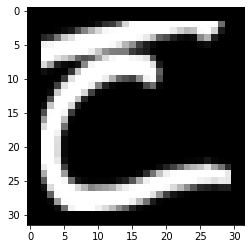

Prediction:  [1]
Label:  1


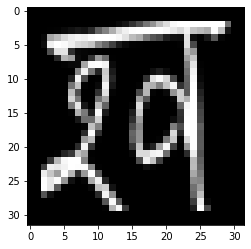

Prediction:  [10]
Label:  10


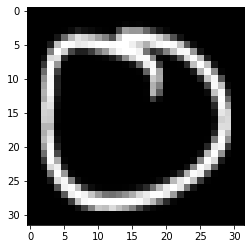

Prediction:  [2]
Label:  2


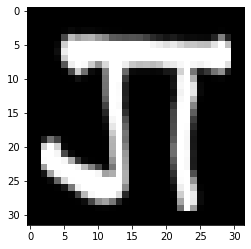

Prediction:  [2]
Label:  2


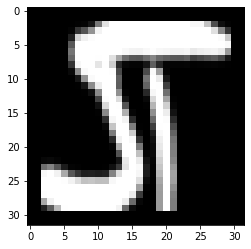

Prediction:  [9]
Label:  9


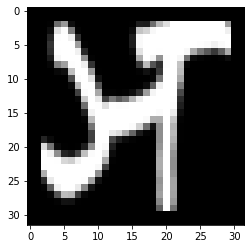

Prediction:  [12]
Label:  12


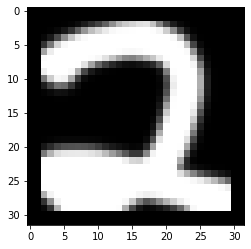

Prediction:  [17]
Label:  17


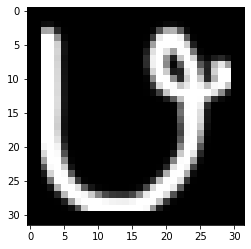

Prediction:  [13]
Label:  13


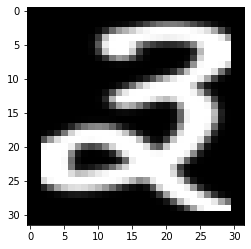

Prediction:  [13]
Label:  13


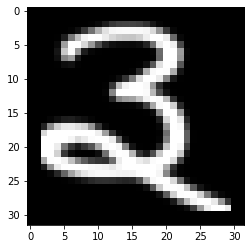

Prediction:  [15]
Label:  16


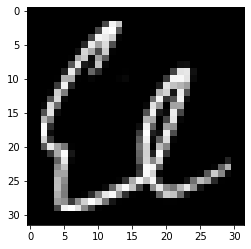

Prediction:  [9]
Label:  9


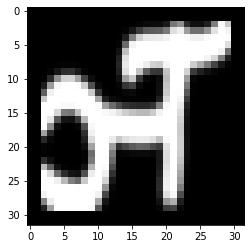

Prediction:  [18]
Label:  18


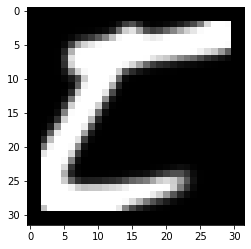

Prediction:  [0]
Label:  0


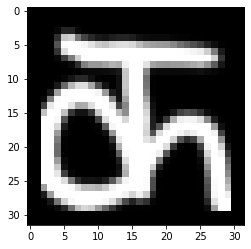

Prediction:  [8]
Label:  8


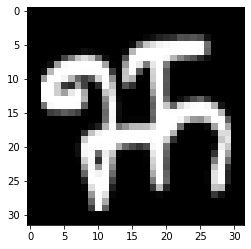

Prediction:  [12]
Label:  12


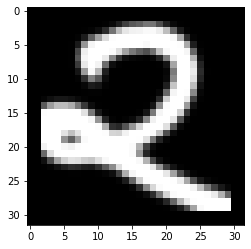

Prediction:  [12]
Label:  12


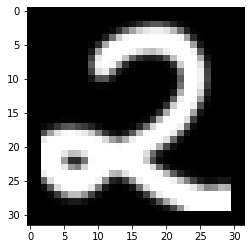

Prediction:  [16]
Label:  16


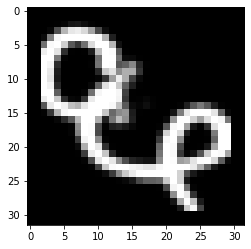

Prediction:  [6]
Label:  3


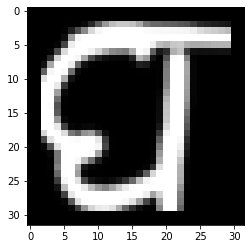

Prediction:  [19]
Label:  19


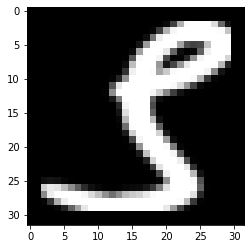

Prediction:  [0]
Label:  0


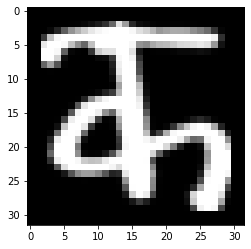

Prediction:  [17]
Label:  17


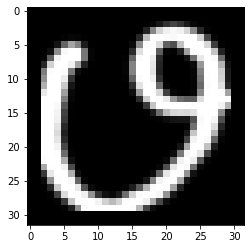

Prediction:  [2]
Label:  2


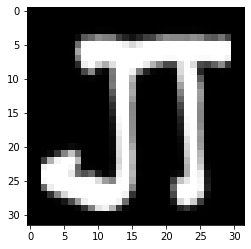

Prediction:  [4]
Label:  4


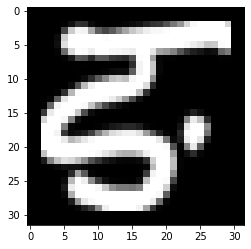

Prediction:  [2]
Label:  2


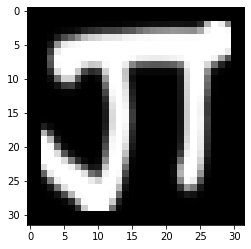

Prediction:  [10]
Label:  10


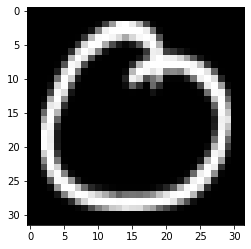

In [11]:
for i in range(1,4000,39):
    test_validation(i, W1, b1, W2, b2, W3, b3)

In [ ]:
def test_unknown(img, W1, b1, W2, b2, W3, b3):
    current_image = cv2.gray(img)
    current_image = current_image.reshape(32,32)
    current_image = current_image.reshape(1024,1)
    current_image = current_image/255
    prediction = make_predictions(img, W1, b1, W2, b2, W3, b3)
    label = 0
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((32, 32)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()